### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
train_data = pd.read_csv("D:/Machine Learning/Loan-Approval-Prediction/Datasets/train_u6lujuX_CVtuZ9i.csv")
test_data = pd.read_csv("D:/Machine Learning/Loan-Approval-Prediction/Datasets/test_Y3wMUE5_7gLdaTN.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print(train_data.columns)
print(test_data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_data.shape

(614, 13)

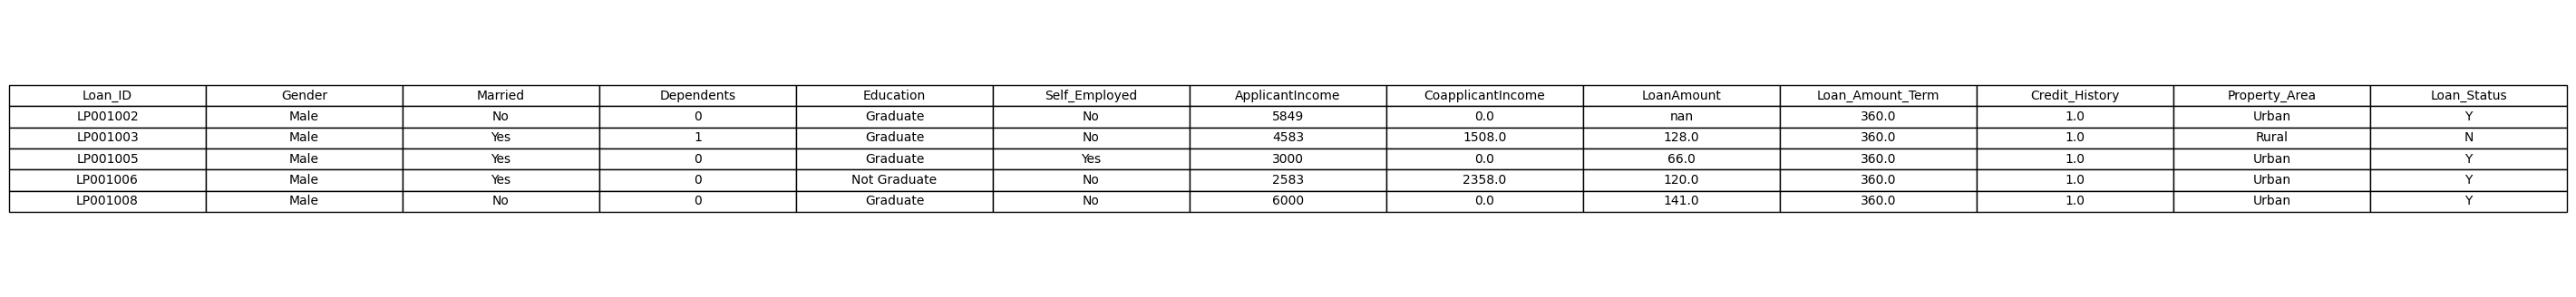

In [8]:
# Select first 5 rows of data
df = train_data.head()

# Create figure with dynamic width based on number of columns
fig, ax = plt.subplots(figsize=(df.shape[1] * 2, 4))  
ax.axis('off')  # Hide axis

# Create the table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)  
table.scale(1.4, 1.4)

# Save as a larger image
plt.savefig("train_data_large_table.png", bbox_inches='tight', dpi=300)

# Show the table
plt.show()

In [9]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


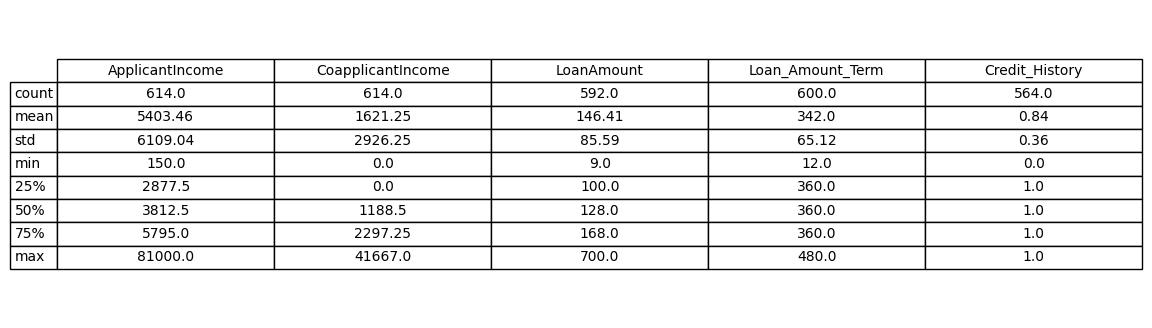

In [10]:
# Get summary stats of numerical columns
summary_df = train_data.describe()
# Set up larger figure size based on number of columns
fig, ax = plt.subplots(figsize=(summary_df.shape[1] * 2, 4))
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(
    cellText=summary_df.values.round(2),     # round numbers for neatness
    rowLabels=summary_df.index,
    colLabels=summary_df.columns,
    cellLoc='center',
    loc='center'
)

# Style settings
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.4, 1.4)

# Save table as image
plt.savefig("train_data_description.png", bbox_inches='tight', dpi=300)
plt.show()

### Preprocessing Missing Data

In [11]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

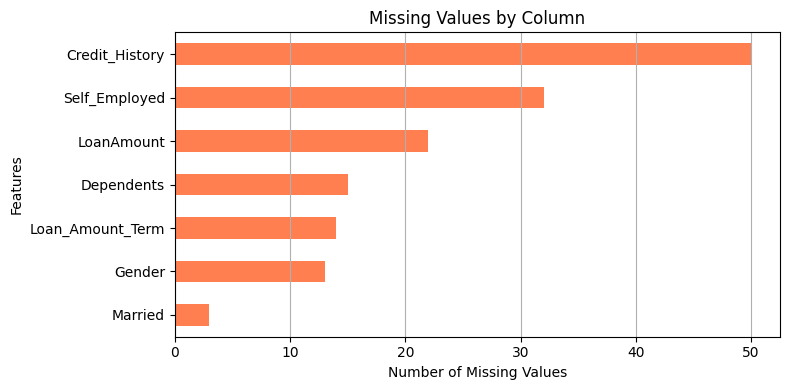

In [12]:
# Visualize missing values in the dataset

# Calculate missing values
missing = train_data.isnull().sum()
missing = missing[missing > 0].sort_values()

# Plot
plt.figure(figsize=(8, 4))
missing.plot(kind='barh', color='coral')
plt.title("Missing Values by Column")
plt.xlabel("Number of Missing Values")
plt.ylabel("Features")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


#### Filling the missing data in the columns

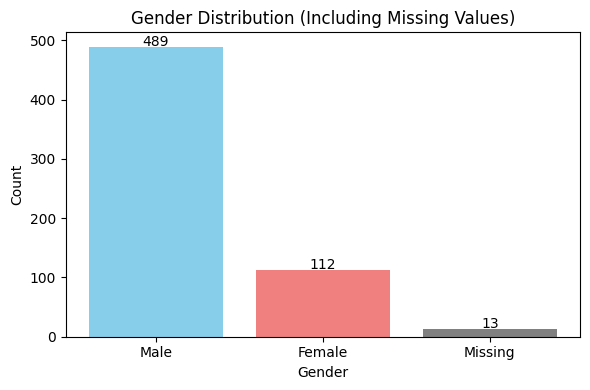

In [13]:

# Fill missing values temporarily as "Missing" for visualization
gender_counts = train_data['Gender'].fillna('Missing').value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral', 'gray'])
plt.title("Gender Distribution (Including Missing Values)")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center')

plt.tight_layout()
plt.show()


In [14]:
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])

In [15]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

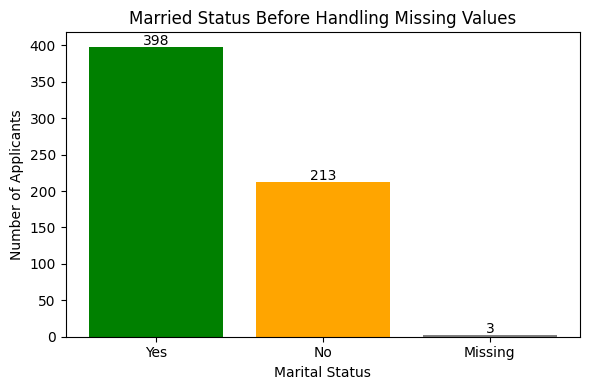

In [16]:
# Create a temporary column replacing NaN with 'Missing'
married_status = train_data['Married'].fillna('Missing')

# Count values
married_counts = married_status.value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(married_counts.index, married_counts.values, color=['green', 'orange', 'gray'])
plt.title("Married Status Before Handling Missing Values")
plt.xlabel("Marital Status")
plt.ylabel("Number of Applicants")

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center')

plt.tight_layout()
plt.show()


In [17]:
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)

In [18]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

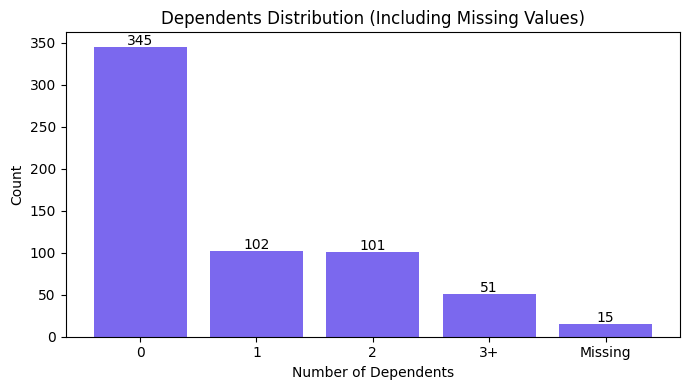

In [19]:
# Replace missing values temporarily with 'Missing' for visualization
dependents_data = train_data['Dependents'].fillna('Missing')

# Count values
dependents_counts = dependents_data.value_counts()

# Plot
plt.figure(figsize=(7, 4))
bars = plt.bar(dependents_counts.index.astype(str), dependents_counts.values, color='mediumslateblue')
plt.title("Dependents Distribution (Including Missing Values)")
plt.xlabel("Number of Dependents")
plt.ylabel("Count")

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center')

plt.tight_layout()
plt.show()


In [20]:
train_data['Dependents'].replace('3+', 3, inplace=True)

In [21]:
train_data['Dependents'] = train_data['Dependents'].astype('float')  # use float in case of NaN

In [22]:
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Dependents'] = train_data['Dependents'].astype('int')

In [23]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

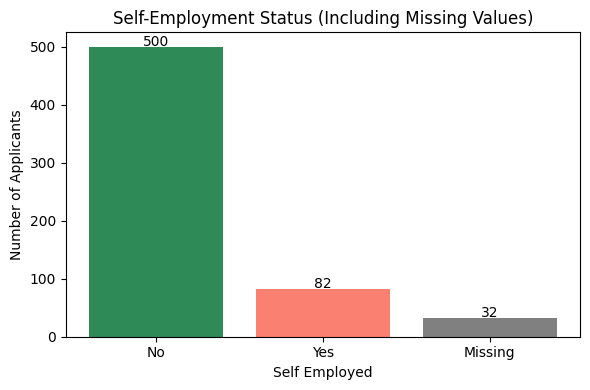

In [24]:
# Replace missing values temporarily for visualization
self_employed_data = train_data['Self_Employed'].fillna('Missing')

# Count value frequencies
self_employed_counts = self_employed_data.value_counts()

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(self_employed_counts.index, self_employed_counts.values, color=['seagreen', 'salmon', 'gray'])
plt.title("Self-Employment Status (Including Missing Values)")
plt.xlabel("Self Employed")
plt.ylabel("Number of Applicants")

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}', ha='center')

plt.tight_layout()
plt.show()


In [25]:
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)

In [26]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

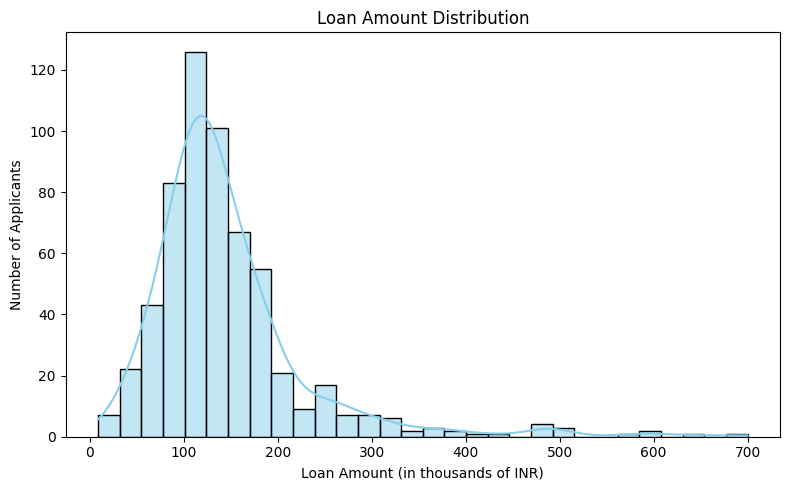

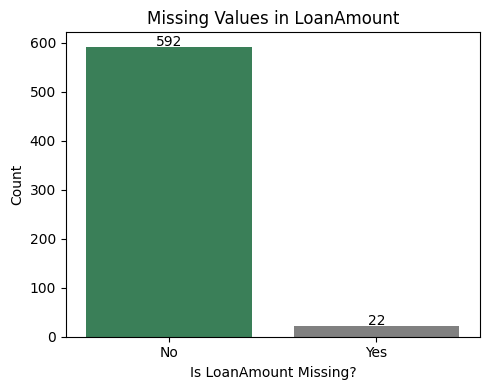

In [27]:
# Create a new column to flag missing values
train_data['LoanAmount_Missing'] = train_data['LoanAmount'].isnull()

# Set up the figure
plt.figure(figsize=(8, 5))

# Plot histogram of loan amounts
sns.histplot(data=train_data, x='LoanAmount', bins=30, kde=True, color='skyblue')

# Title and labels
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount (in thousands of INR)")
plt.ylabel("Number of Applicants")

plt.tight_layout()
plt.show()

# Plot count of missing vs non-missing
plt.figure(figsize=(5, 4))
sns.countplot(x='LoanAmount_Missing', data=train_data, palette=['seagreen', 'gray'])
plt.title("Missing Values in LoanAmount")
plt.xlabel("Is LoanAmount Missing?")
plt.ylabel("Count")
plt.xticks([0, 1], ['No', 'Yes'])

# Add labels
for i, val in enumerate(train_data['LoanAmount_Missing'].value_counts()):
    plt.text(i, val + 2, f'{val}', ha='center')

plt.tight_layout()
plt.show()


In [28]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [29]:
train_data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
LoanAmount_Missing     0
dtype: int64

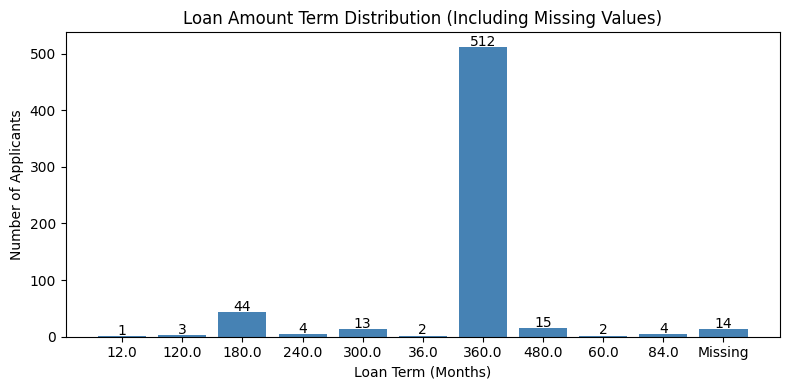

In [30]:
# Replace NaN with 'Missing' just for visualization
loan_term_data = train_data['Loan_Amount_Term'].fillna('Missing')

# Convert all to string for display
loan_term_counts = loan_term_data.astype(str).value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 4))
bars = plt.bar(loan_term_counts.index, loan_term_counts.values, color='steelblue')
plt.title("Loan Amount Term Distribution (Including Missing Values)")
plt.xlabel("Loan Term (Months)")
plt.ylabel("Number of Applicants")

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}', ha='center')

plt.tight_layout()
plt.show()


In [31]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [32]:
train_data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        50
Property_Area          0
Loan_Status            0
LoanAmount_Missing     0
dtype: int64

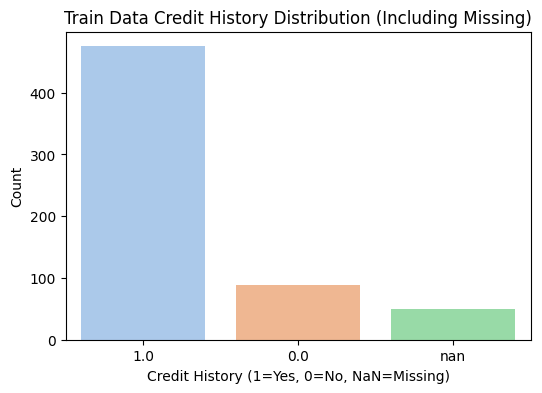

In [33]:
# Step 1: Visualize Credit_History in train_data
credit_counts = train_data['Credit_History'].value_counts(dropna=False)

plt.figure(figsize=(6,4))
sns.barplot(x=credit_counts.index.astype(str), y=credit_counts.values, palette='pastel')
plt.xlabel('Credit History (1=Yes, 0=No, NaN=Missing)')
plt.ylabel('Count')
plt.title('Train Data Credit History Distribution (Including Missing)')
plt.show()

In [34]:
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_Missing    0
dtype: int64

In [35]:
print("\nColumn names: ")
for column in train_data.columns:
    print(column)


Column names: 
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status
LoanAmount_Missing


### Counts

Gender
Male      502
Female    112
Name: count, dtype: int64


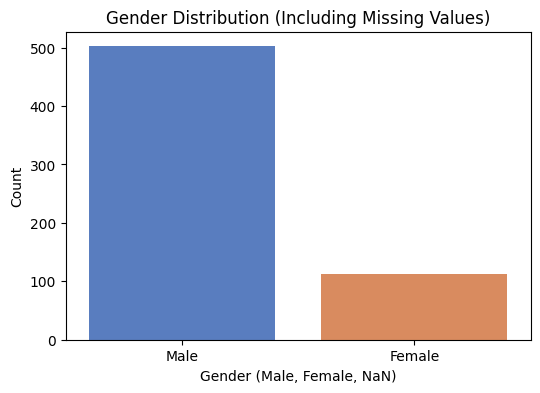

In [36]:
# Print counts including missing
gender_counts = train_data['Gender'].value_counts(dropna=False)
print(gender_counts)

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=gender_counts.index.astype(str), y=gender_counts.values, palette='muted')
plt.xlabel('Gender (Male, Female, NaN)')
plt.ylabel('Count')
plt.title('Gender Distribution (Including Missing Values)')
plt.show()


Married
Yes    401
No     213
Name: count, dtype: int64


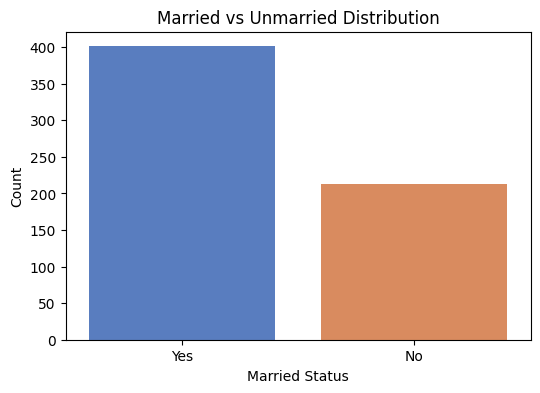

In [37]:
# Get counts for Married column (assuming no missing values)
married_counts = train_data['Married'].value_counts()

print(married_counts)

# Plot bar chart without NaN category
plt.figure(figsize=(6,4))
sns.barplot(x=married_counts.index, y=married_counts.values, palette='muted')
plt.xlabel('Married Status')
plt.ylabel('Count')
plt.title('Married vs Unmarried Distribution')
plt.show()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64


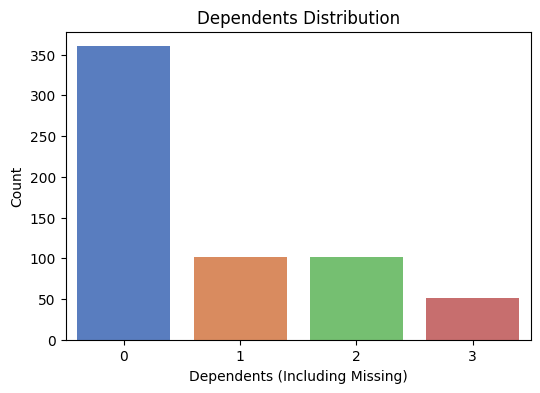

In [38]:
# Count values including missing
dependents_counts = train_data['Dependents'].value_counts(dropna=False)
print(dependents_counts)

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=dependents_counts.index.astype(str), y=dependents_counts.values, palette='muted')
plt.xlabel('Dependents (Including Missing)')
plt.ylabel('Count')
plt.title('Dependents Distribution')
plt.show()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


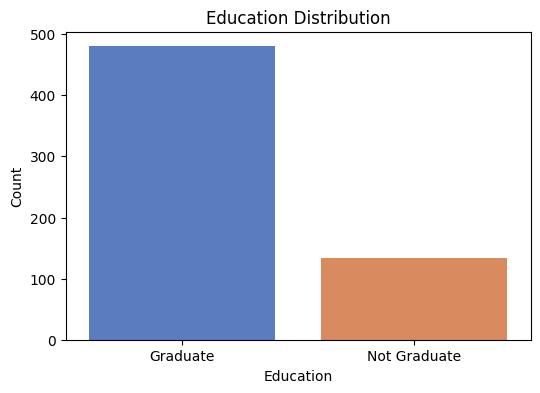

In [39]:
# Count values (no missing since processed)
education_counts = train_data['Education'].value_counts()

print(education_counts)

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='muted')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


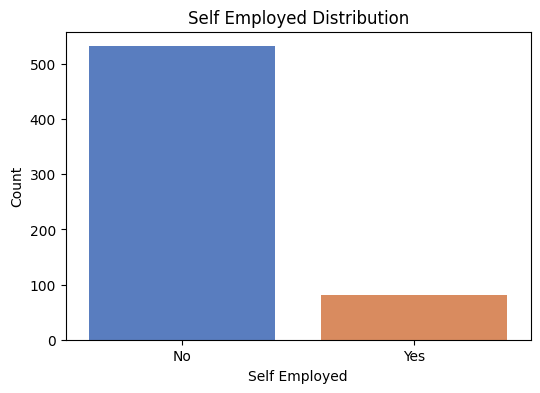

In [40]:
self_employed_counts = train_data['Self_Employed'].value_counts()

print(self_employed_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=self_employed_counts.index, y=self_employed_counts.values, palette='muted')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.title('Self Employed Distribution')
plt.show()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


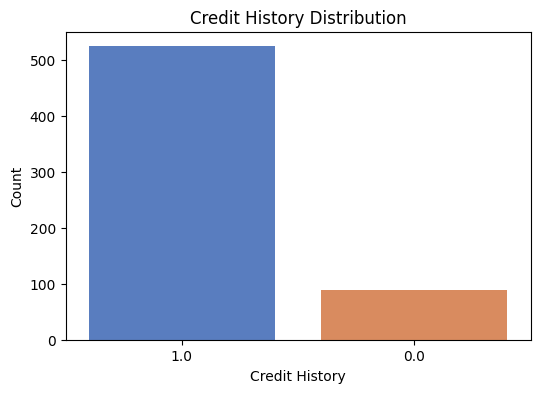

In [41]:
credit_history_counts = train_data['Credit_History'].value_counts()

print(credit_history_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=credit_history_counts.index.astype(str), y=credit_history_counts.values, palette='muted')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Credit History Distribution')
plt.show()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


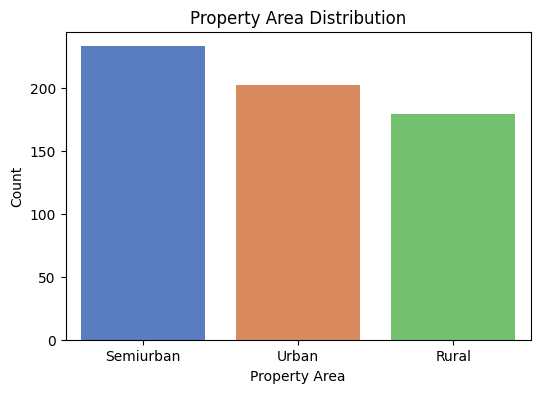

In [42]:
property_area_counts = train_data['Property_Area'].value_counts()

print(property_area_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=property_area_counts.index, y=property_area_counts.values, palette='muted')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Property Area Distribution')
plt.show()

Loan_Status
Y    422
N    192
Name: count, dtype: int64


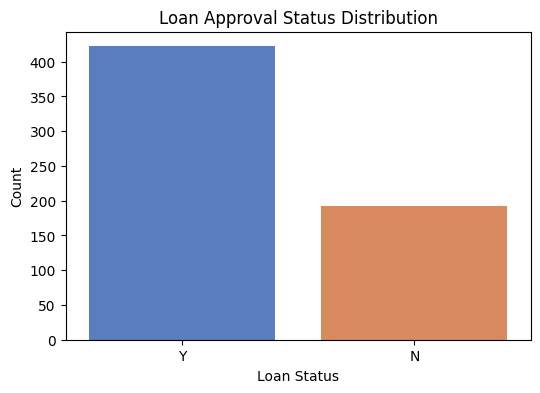

In [43]:
loan_status_counts = train_data['Loan_Status'].value_counts()

print(loan_status_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='muted')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Approval Status Distribution')
plt.show()